# Vehicle dynamics

The position of vehicle $i$ is $x_i(t)$ The distance to the vehicle or object
in front of vehicle $i$ is $q_i(t)$.

The vehicle speed $v_i(t) = \dot{x}_i(t)$. 

The control input to the vehicle is the acceleration $u_i$.

The desired distance to the obstacle in front $\hat{q}_i$ is calculated by scaling
with the current vehicle speed:

$$ \hat{q}_i(t) = k_q v_i(t) $$

Define a PD controller as:

$$ r_i(t) = q_i(t) - \hat{q}_i(t) $$
$$ u_i = k_p r_i(t) + k_d \frac{r_i(t) - r_i(t-\Delta t)}{\Delta t} $$


## Single vehicle approaching fixed obstacle

Let there be a vehicle starting at $x=0$ with an obstacle at $200$ so $q=200-x$.

In [1]:
import numpy as np

In [4]:
# Dynamic variables
x = 0
v = 0

# Runway
q0 = 200

# Desired distance
kq = 5.0

# Max/min speeds
v_max = 20.0
v_min = 0.0

# Timestep
dt = 0.1

# r() at previous timestep
r_old = 0

# Control params
k_d = 0.5
k_p = 0.1

def q():
    global q0, x
    return q0 - x

def qhat() -> float:
    global kq,v
    return np.max([5.0, kq*v])

def r():
    return q() - qhat()

def r_diff():
    global r_old, dt
    return (r() - r_old) / dt

def u():
    global k_p, k_d
    return k_p * r() + k_d * r_diff()

def step():
    global x,v
    u_calc = u()
    v_calc = v + dt * u_calc
    v_calc = np.min([v_max, np.max([v_min, v_calc])])
    x_calc = x + dt * v_calc

    x = x_calc
    v = v_calc

    r_old = r()

N=1000
result = np.zeros([N])
n = 0
while n < N:
    result[n] = x
    step()
    n+= 1


In [5]:
from matplotlib import pyplot as plt

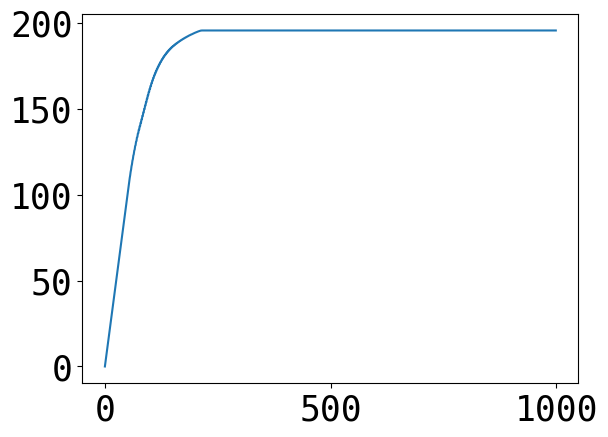

In [8]:
plt.plot(result)